# K-Nearest Neighbor Classifier

## Main Task
> Predicting if a patient has breast cancer or not, more specifically if a patient is in *benign or not-cancer condition (2)* **OR** the patient is in *malignant or has cancer (4)*.

### Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *breast-cancer-wisconsin.csv* contains information about different patients that either have cancer or not. The dataset is collected by Dr. WIlliam H. Wolberg (physician), University of Wisconsin Hospitals, Madison, Wisconsin, USA.

**2.0. Which data format?**  
The dataset is in *csv* format!  

**2.1. Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  
Example: 
*id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal*
*1000025,5,1,1,1,2,1,3,1,1,2*

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 11 features or columns!
* 691 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
Yes it contains 11 numerical features!  

**5.0. Does it contain categorical features?  How many?**  
Yes it contains 1 categorical features! (The target class has *2* or *4* values.)  

In [20]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [21]:
dataset = pd.read_csv("../Datasets/breast-cancer-wisconsin.csv")
dataset = dataset.replace("?", np.NaN)

In [22]:
RANDOM_STATE = 42

### Basic Exploratory Data Analysis

In [23]:
dataset.head()

,id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
dataset.describe()

,id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,blandchromatin,normalnucleoli,mitoses,benormal
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [25]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 11 and the number of observations/rows in the dataset is 699


#### Handling Missing Values

In [26]:
dataset.isna().sum()

id                   0
clumpthickness       0
uniformcellsize      0
uniformcellshape     0
margadhesion         0
epithelial           0
barenuclei          16
blandchromatin       0
normalnucleoli       0
mitoses              0
benormal             0
dtype: int64

In [27]:
dataset.isnull().sum()

id                   0
clumpthickness       0
uniformcellsize      0
uniformcellshape     0
margadhesion         0
epithelial           0
barenuclei          16
blandchromatin       0
normalnucleoli       0
mitoses              0
benormal             0
dtype: int64

In [28]:
dataset = dataset.dropna()

## Model Building
### Data Pre-Processing

In [29]:
# The ID column should not be included as a feature in your machine learning model, as it does not
# provide any predictive value. IDs are unique identifiers and do not contain any information that 
# would help in predicting the target class.
dataset = dataset.drop(columns=['id'])

In [30]:
dataset.head()

,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Checking the correlation between features

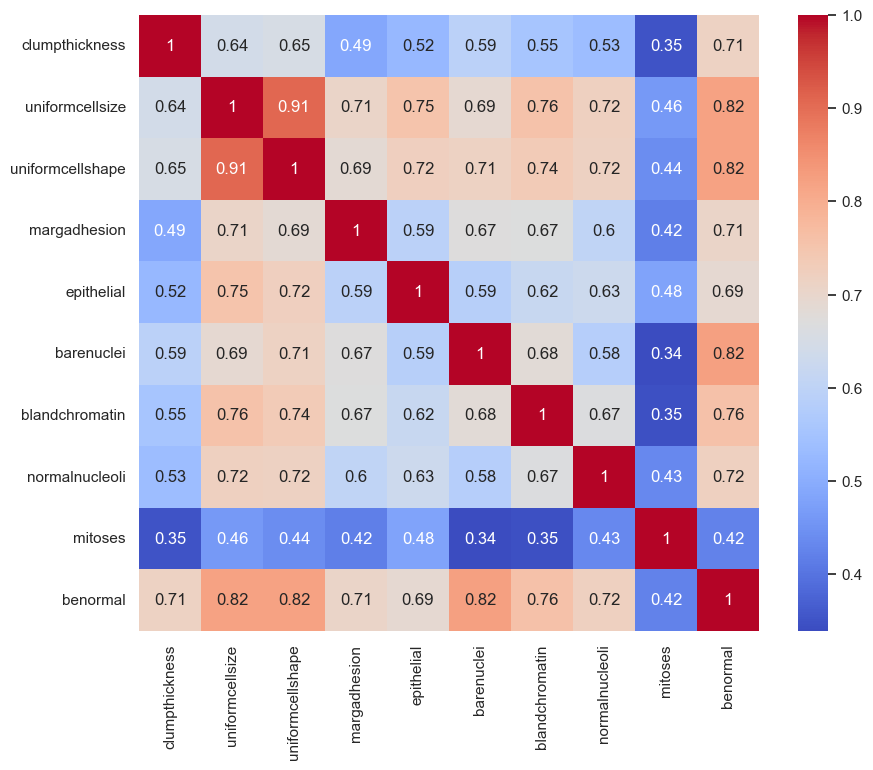

In [31]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X.shape, y.shape

((683, 9), (683,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [34]:
print(X)

[[5 1 1 ... 3 1 1]
 [5 4 4 ... 3 2 1]
 [3 1 1 ... 3 1 1]
 ...
 [5 10 10 ... 8 10 2]
 [4 8 6 ... 10 6 1]
 [4 8 8 ... 10 4 1]]


### Feature Scaling Needed

X- variables have different range, the one with a large range can influence more the model! 

> The goal is to ensure that all features have a similar scale so that no particular feature dominates others when a model is being trained!  

In [35]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

### Checking if there is a class imbalance in the y-variable

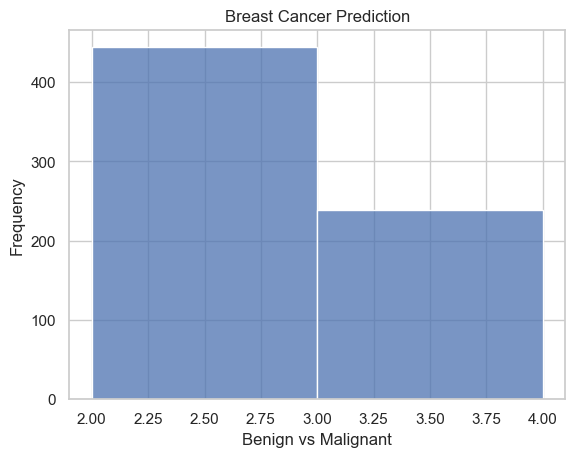

In [36]:
sns.set_theme(style='whitegrid') #Set the style of seaborn for the plot!
fig, ax = plt.subplots() #Create a figure and axis for the plot!
sns.histplot(dataset['benormal'], bins=2, ax=ax) #Plotting the histogram using seaborn
# Set the title and labels
ax.set_title('Breast Cancer Prediction')
ax.set_xlabel('Benign vs Malignant')
ax.set_ylabel('Frequency')
# Show the plot
plt.show()

* Benign has approximately 460 instances!
* Malignant has approximately 230 instances!
> There is a class imbalance here in target class, as *Benign* class is twice as frequent as the *Malignant* class!

### Training the Logistic Regression model on the training set
> Using K-Fold cross validation and GridSearchCV for finding the best hyperparameters!  

In [37]:
knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 16),
    'metric': ['manhattan', 'euclidean']
}

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(1, 16)},
             scoring='accuracy')